Limpeza inicial

In [ ]:
import pandas as pd

#Criando um conjunto de dados inconsistentes

dados = {'Nome': ['Ana', 'Bruna', 'Carlos', 'ANA', 'bruno'],
        'Idade': ['25', '30 anos', '29', '25', '30'],
        'Salario': ['3000', '4000R$', '5000', '3000', '4000R$']}

df = pd.DataFrame(dados)

print(27*'-')
print('X Dados com inconsistencias X')
print(df)
print(27*'-')

#Removendo espacoes extras e padronizando letras maisculas e minusculas
df['Nome'] = df['Nome'].str.strip().str.capitalize()

print(27*'-')
print('Removendo espacos e padronizando letras')
print(df)
print(27*'-')

#Removendo caracteres nao numericos e convertendo para inteiro - Idade
df['Idade'] = df['Idade'].str.extract('(\\d+)').astype(int)

#Removendo caracteres nao numericos e convertendo para float - Salario
df['Salario'] = df['Salario'].str.extract('(\\d+)').astype(int)

print(27*'-')
print('Convertendo para inteiro')
print(df)
print(27*'-')

#Removendo valores duplicados
df = df.drop_duplicates()

print(27*'-')
print('Removendo duplicatas')
print(df)
print(27*'-')

In [58]:
#Criar um conjunto de dados com caracteres indesejados
dados = {
    'Produto': ['TV 4K!!!', 'Smartphone*', 'Notebook@', 'Tablet##'],
    'Preco': ['R$2000', 'R$1500', 'R$3500', 'R$1200']
}

df = pd.DataFrame(dados)
#print(df)


df['Produto'] = df['Produto'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df['Preco'] = df['Preco'].str.extract('(\\d+)').astype(int)

print(df)

      Produto  Preco
0       TV 4K   2000
1  Smartphone   1500
2    Notebook   3500
3      Tablet   1200


Tratamento de Outliers

Dados com outliers: [ 10  12  11  10 100   9   8  10 105  12]
Dados sem outliers: [10 12 11 10  9  8 10 12]


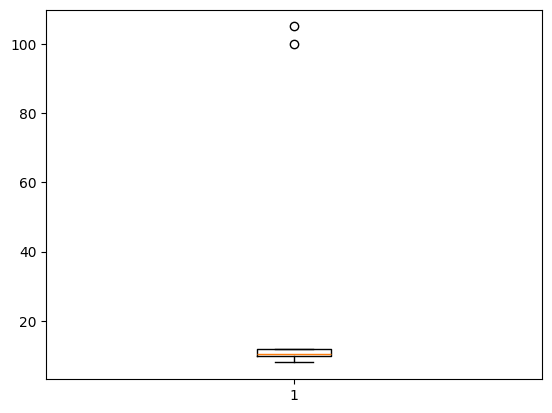

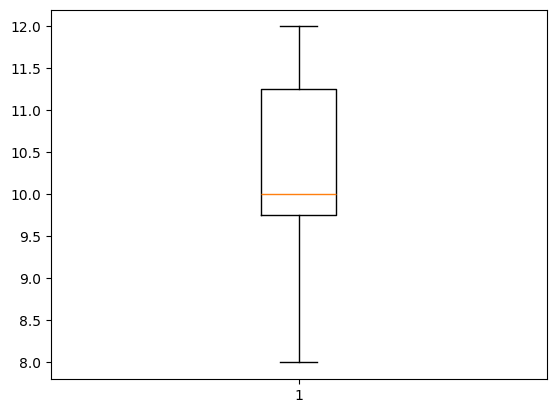

In [66]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.array([10, 12, 11, 10, 100, 9, 8, 10, 105, 12])

Q1 = np.percentile(dados, 25)
Q3 = np.percentile(dados, 75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

dados_filtrados = dados[(dados >= limite_inferior) & (dados <= limite_superior)]
print("Dados com outliers:", dados)
print("Dados sem outliers:", dados_filtrados)

plt.boxplot(dados)
plt.show()

plt.boxplot(dados_filtrados)
plt.show()

In [67]:
import numpy as np
import pandas as pd

dados = {'Idade': [22,25,26,23,30,28,120,24,22,200]}
df = pd.DataFrame(dados)

Q1 = df['Idade'].quantile(0.25)
Q3 = df['Idade'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Idade'] < limite_inferior) | (df['Idade'] > limite_superior)]

mediana = df["Idade"].median()
df.loc[outliers.index, 'Idade'] = mediana

print(df)

   Idade
0   22.0
1   25.0
2   26.0
3   23.0
4   30.0
5   28.0
6   25.5
7   24.0
8   22.0
9   25.5


C:\Users\50749314877\AppData\Local\Temp\ipykernel_2104\2091609351.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, 'Idade'] = mediana
